In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from CHAID import Tree

In [2]:
data = pd.read_csv('Police_Stop_Data2.csv')
data.head()

OBJECTID masterIncidentNumber            responseDate  reason  \
0         1            16-395258  2016/10/31 22:40:47+00     NaN   
1         2            16-395296  2016/10/31 23:06:36+00     NaN   
2         3            16-395326  2016/10/31 23:20:54+00     NaN   
3         4            16-395328  2016/10/31 23:23:20+00     NaN   
4         5            16-395333  2016/10/31 23:26:05+00     NaN   

                       problem      callDisposition  citationIssued  \
0        Suspicious Person (P)          BKG-Booking             NaN   
1  Traffic Law Enforcement (P)           TAG-Tagged             NaN   
2          Attempt Pick-Up (P)          RFD-Refused             NaN   
3        Suspicious Person (P)          BKG-Booking             NaN   
4       Suspicious Vehicle (P)  GOA-Gone on Arrival             NaN   

  personSearch vehicleSearch  preRace     race   gender        lat       long  \
0          YES            NO    Black    Black     Male  44.979570 -93.272570   
1           NO            NO  Unknown    Black     Male  44.962689 -93.275921   
2           NO            NO  Unknown  Unknown  Unknown  45.024836 -93.288069   
3          YES            NO    Black    Black     Male  44.946560 -93.247410   
4           NO            NO    Other  Unknown     Male  44.906170 -93.255010   

              x             y  policePrecinct  \
0 -1.038306e+07  5.618306e+06             1.0   
1 -1.038343e+07  5.615650e+06             5.0   
2 -1.038478e+07  5.625432e+06             4.0   
3 -1.038025e+07  5.613112e+06             3.0   
4 -1.038110e+07  5.606762e+06             3.0   

                       neighborhood          lastUpdateDate  
0                     Downtown West  2017/08/08 10:25:31+00  
1  Steven's Square - Loring Heights  2017/08/08 10:26:13+00  
2                   Webber - Camden  2017/08/08 10:24:35+00  
3                          Corcoran  2017/08/08 10:25:31+00  
4                              Hale  2017/08/08 10:25:03+00

In [3]:
ProfileReport(data) 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

By looking at the ProfileReport, these fields have missing values : reason (fully missing), callDisposition, citationIssued (fully missing), personSearch, vehicleSearch, preRace, race, gender, policePrecinct, neighborhood.

drop reason and citationIssued fields because they dont have a entry

In [4]:
data = data.drop(['reason', 'citationIssued'], axis=1)
data.head()

OBJECTID masterIncidentNumber            responseDate  \
0         1            16-395258  2016/10/31 22:40:47+00   
1         2            16-395296  2016/10/31 23:06:36+00   
2         3            16-395326  2016/10/31 23:20:54+00   
3         4            16-395328  2016/10/31 23:23:20+00   
4         5            16-395333  2016/10/31 23:26:05+00   

                       problem      callDisposition personSearch  \
0        Suspicious Person (P)          BKG-Booking          YES   
1  Traffic Law Enforcement (P)           TAG-Tagged           NO   
2          Attempt Pick-Up (P)          RFD-Refused           NO   
3        Suspicious Person (P)          BKG-Booking          YES   
4       Suspicious Vehicle (P)  GOA-Gone on Arrival           NO   

  vehicleSearch  preRace     race   gender        lat       long  \
0            NO    Black    Black     Male  44.979570 -93.272570   
1            NO  Unknown    Black     Male  44.962689 -93.275921   
2            NO  Unknown  Unknown  Unknown  45.024836 -93.288069   
3            NO    Black    Black     Male  44.946560 -93.247410   
4            NO    Other  Unknown     Male  44.906170 -93.255010   

              x             y  policePrecinct  \
0 -1.038306e+07  5.618306e+06             1.0   
1 -1.038343e+07  5.615650e+06             5.0   
2 -1.038478e+07  5.625432e+06             4.0   
3 -1.038025e+07  5.613112e+06             3.0   
4 -1.038110e+07  5.606762e+06             3.0   

                       neighborhood          lastUpdateDate  
0                     Downtown West  2017/08/08 10:25:31+00  
1  Steven's Square - Loring Heights  2017/08/08 10:26:13+00  
2                   Webber - Camden  2017/08/08 10:24:35+00  
3                          Corcoran  2017/08/08 10:25:31+00  
4                              Hale  2017/08/08 10:25:03+00

In [5]:
data.dtypes

OBJECTID                  int64
masterIncidentNumber     object
responseDate             object
problem                  object
callDisposition          object
personSearch             object
vehicleSearch            object
preRace                  object
race                     object
gender                   object
lat                     float64
long                    float64
x                       float64
y                       float64
policePrecinct          float64
neighborhood             object
lastUpdateDate           object
dtype: object

Lets plot a bar chart to see races and their most occured problems

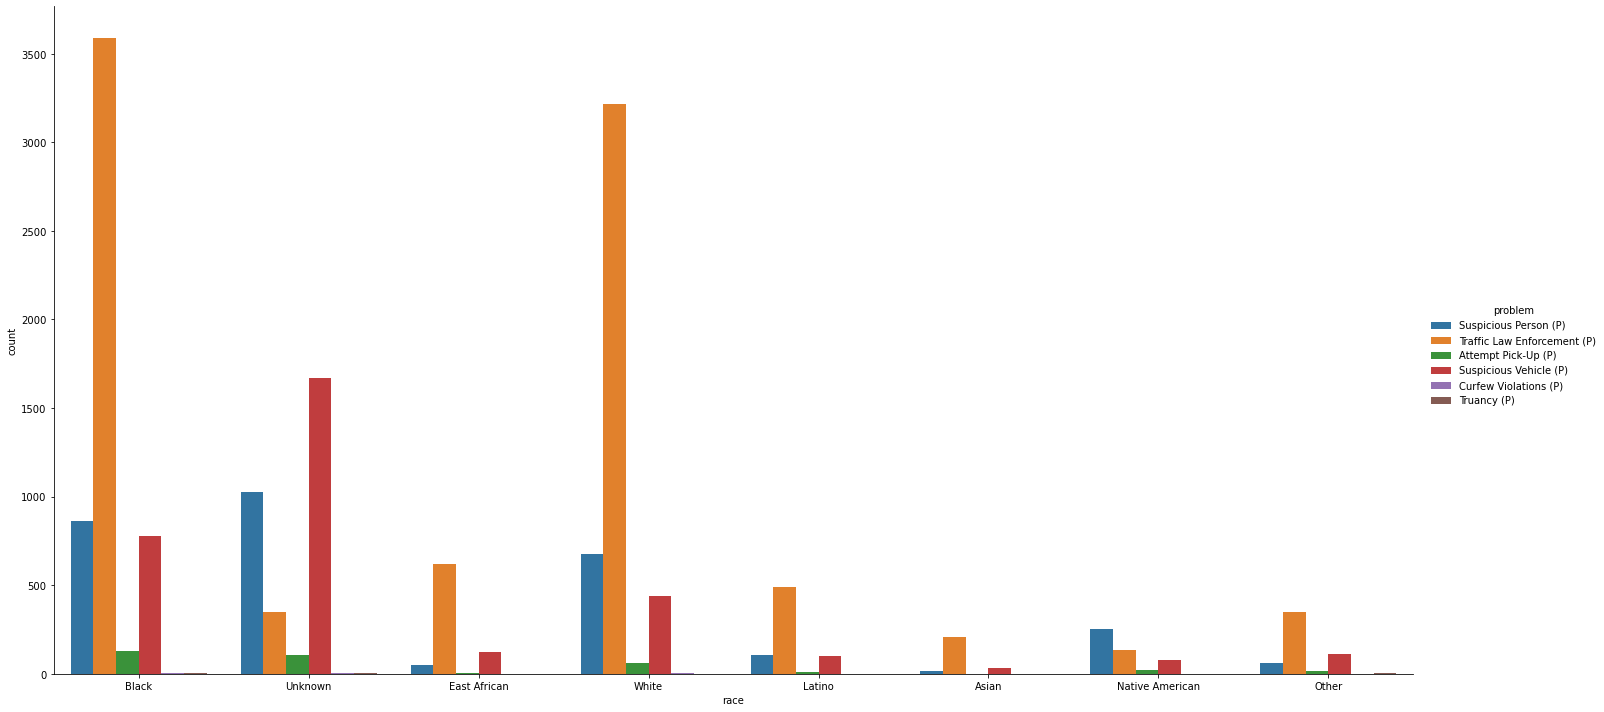

In [6]:
import seaborn as sns
sns.catplot(data, x='race', hue='problem', kind='count', height=10, aspect=2)

Now, I plot a bar chart to see which race commited crime the most.

<AxesSubplot:xlabel='race', ylabel='count'>

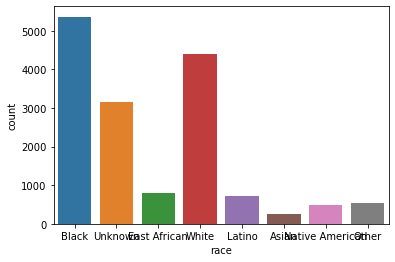

In [7]:
sns.countplot(data, x='race')

We have latitude, longitude and neighborhoods. So I can show these points in a map to make visualization.

In [10]:
import plotly.graph_objs as go
lats = data['lat'].values
longs = data['long'].values
neighborhoods = data['neighborhood'].values
minneapolis_location = [44.9778, -93.2650]

fig = go.Scattermapbox(
    lat=lats,
    lon=longs,
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=10,
        color='rgb(255, 0, 0)',
        opacity=0.7
    ),
    text=neighborhoods,
    hoverinfo='text'
)



ZOOM IN THE MAP BY SCROLLING TO SEE POINTS.

In [11]:
layout = go.Layout(
    title='Minneapolis Police Stops',
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        style='open-street-map',
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=minneapolis_location[0],
            lon=minneapolis_location[1]
        ),
    pitch=0,
    zoom=14,
    ),
)

map = go.Figure(data=[fig], layout=layout)
map.show()

Hint is choose 5 features for analysis. I will choose my fields based on heatmap at the ProfileReport. (highest corrolation to lowest with the race field)

In [12]:
# Highest corrolation fields with the race is : gender, preRace, callDisposition, personSearch and problem. Drop other fields
data_analysis = data.drop(['OBJECTID', 'masterIncidentNumber', 'responseDate', 'vehicleSearch', 'lat', 'long', 'x', 'y', 'policePrecinct', 'lastUpdateDate', 'neighborhood'], axis=1)
data_analysis.head()

problem      callDisposition personSearch  preRace  \
0        Suspicious Person (P)          BKG-Booking          YES    Black   
1  Traffic Law Enforcement (P)           TAG-Tagged           NO  Unknown   
2          Attempt Pick-Up (P)          RFD-Refused           NO  Unknown   
3        Suspicious Person (P)          BKG-Booking          YES    Black   
4       Suspicious Vehicle (P)  GOA-Gone on Arrival           NO    Other   

      race   gender  
0    Black     Male  
1    Black     Male  
2  Unknown  Unknown  
3    Black     Male  
4  Unknown     Male

In [13]:
print(data_analysis.isnull().sum())

problem               0
callDisposition     396
personSearch       2858
preRace            2858
race               2858
gender             2858
dtype: int64


In [14]:
data_analysis.describe()

problem callDisposition personSearch  preRace  \
count                         18568           18172        15710    15710   
unique                            6              24            2        8   
top     Traffic Law Enforcement (P)     ADV-Advised           NO  Unknown   
freq                          10101            8576        13906    10870   

         race gender  
count   15710  15710  
unique      8      4  
top     Black   Male  
freq     5362   9605

Drop rows that has NaN values.

In [15]:
data_analysis = data_analysis.dropna()
print(data_analysis.isnull().sum())

problem            0
callDisposition    0
personSearch       0
preRace            0
race               0
gender             0
dtype: int64


Know, in order to make chaid analysis. I transform my categorical fields using get_dummies.

In [16]:
data_analysis = pd.get_dummies(data_analysis, drop_first=True)
data_analysis.head()

problem_Curfew Violations (P)  problem_Suspicious Person (P)  \
0                              0                              1   
1                              0                              0   
2                              0                              0   
3                              0                              1   
4                              0                              0   

   problem_Suspicious Vehicle (P)  problem_Traffic Law Enforcement (P)  \
0                               0                                    0   
1                               0                                    1   
2                               0                                    0   
3                               0                                    0   
4                               1                                    0   

   problem_Truancy (P)  callDisposition_AOK- All OK  \
0                    0                            0   
1                    0                            0   
2                    0                            0   
3                    0                            0   
4                    0                            0   

   callDisposition_AQT-All Quiet  callDisposition_BKG-Booking  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            1   
4                              0                            0   

   callDisposition_DTX-Detox  callDisposition_FAL-False  ...  race_Black  \
0                          0                          0  ...           1   
1                          0                          0  ...           1   
2                          0                          0  ...           0   
3                          0                          0  ...           1   
4                          0                          0  ...           0   

   race_East African  race_Latino  race_Native American  race_Other  \
0                  0            0                     0           0   
1                  0            0                     0           0   
2                  0            0                     0           0   
3                  0            0                     0           0   
4                  0            0                     0           0   

   race_Unknown  race_White  gender_Gender Non-Conforming  gender_Male  \
0             0           0                             0            1   
1             0           0                             0            1   
2             1           0                             0            0   
3             0           0                             0            1   
4             1           0                             0            1   

   gender_Unknown  
0               0  
1               0  
2               1  
3               0  
4               0  

[5 rows x 44 columns]

isolate independent and dependent names.

In [17]:
a = ['race_Black', 'race_East African', 'race_Latino', 'race_Native American', 'race_Other', 'race_Unknown', 'race_White']
X_names = data_analysis.drop(a, axis=1).columns
X_names


Index(['problem_Curfew Violations (P)', 'problem_Suspicious Person (P)',
       'problem_Suspicious Vehicle (P)', 'problem_Traffic Law Enforcement (P)',
       'problem_Truancy (P)', 'callDisposition_AOK- All OK',
       'callDisposition_AQT-All Quiet', 'callDisposition_BKG-Booking',
       'callDisposition_DTX-Detox', 'callDisposition_FAL-False',
       'callDisposition_GOA-Gone on Arrival',
       'callDisposition_INF-Information', 'callDisposition_INS-Inservice',
       'callDisposition_MES-Message Left', 'callDisposition_NOS-No Service',
       'callDisposition_RFD-Refused', 'callDisposition_RPR-Reprimand/Release',
       'callDisposition_RPT-Report', 'callDisposition_SCK-Sick',
       'callDisposition_SEC- Secured', 'callDisposition_SNT-Sent',
       'callDisposition_TAG-Tagged', 'callDisposition_TOW-Towed',
       'callDisposition_TRN-Transport', 'callDisposition_UNF-Unfounded',
       'callDisposition_UTL-Unable to Locate', 'personSearch_YES',
       'preRace_Black', 'preRace_Ea

In [18]:
y_names = data_analysis[a].columns
y_names

Index(['race_Black', 'race_East African', 'race_Latino',
       'race_Native American', 'race_Other', 'race_Unknown', 'race_White'],
      dtype='object')

CHAID TREE

In [21]:
black = y_names[0]
african = y_names[1]
latino = y_names[2]
native = y_names[3]
white = y_names[6]
model = Tree.from_pandas_df(data_analysis,
                            dict(zip(X_names, 
                                     ['nominal'] * 37)), 
                            black, 
                            min_child_node_size= 250, 
                            max_depth= 2)

In [22]:
model.print_tree()

([], {0: 10348.0, 1: 5362.0}, (preRace_Black, p=0.0, score=2557.0442517073247, groups=[[0], [1]]), dof=1))
|-- ([0], {0: 10014.0, 1: 3655.0}, (preRace_Unknown, p=1.0386170293494937e-253, score=1157.5249308193427, groups=[[0], [1]]), dof=1))
|   |-- ([0], {0: 2761.0, 1: 38.0}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- ([1], {0: 7253.0, 1: 3617.0}, <Invalid Chaid Split> - the max depth has been reached)
+-- ([1], {0: 334.0, 1: 1707.0}, (callDisposition_GOA-Gone on Arrival, p=1.5978017928656429e-180, score=820.8290491131374, groups=[[0], [1]]), dof=1))
    |-- ([0], {0: 128.0, 1: 1644.0}, <Invalid Chaid Split> - the max depth has been reached)
    +-- ([1], {0: 206.0, 1: 63.0}, <Invalid Chaid Split> - the max depth has been reached)



In [23]:
model.to_tree().to_graphviz()


digraph tree {
	"0" [label="([], {0: 10348.0, 1: 5362.0}, (preRace_Black, p=0.0, score=2557.0442517073247, groups=[[0], [1]]), dof=1))", shape=circle]
	"1" [label="([0], {0: 10014.0, 1: 3655.0}, (preRace_Unknown, p=1.0386170293494937e-253, score=1157.5249308193427, groups=[[0], [1]]), dof=1))", shape=circle]
	"4" [label="([1], {0: 334.0, 1: 1707.0}, (callDisposition_GOA-Gone on Arrival, p=1.5978017928656429e-180, score=820.8290491131374, groups=[[0], [1]]), dof=1))", shape=circle]
	"2" [label="([0], {0: 2761.0, 1: 38.0}, <Invalid Chaid Split> - the max depth has been reached)", shape=circle]
	"3" [label="([1], {0: 7253.0, 1: 3617.0}, <Invalid Chaid Split> - the max depth has been reached)", shape=circle]
	"5" [label="([0], {0: 128.0, 1: 1644.0}, <Invalid Chaid Split> - the max depth has been reached)", shape=circle]
	"6" [label="([1], {0: 206.0, 1: 63.0}, <Invalid Chaid Split> - the max depth has been reached)", shape=circle]

	"0" -> "1"
	"0" -> "4"
	"1" -> "2"
	"1" -> "3"
	"4" -> "5"

In [24]:
model2 = Tree.from_pandas_df(data_analysis,
                            dict(zip(X_names, 
                                     ['nominal'] * 37)), 
                            african, 
                            min_child_node_size= 250, 
                            max_depth= 2)

model2.print_tree()

([], {0: 14911.0, 1: 799.0}, (problem_Traffic Law Enforcement (P), p=7.398994912238618e-34, score=147.11691665536, groups=[[0], [1]]), dof=1))
|-- ([0], {0: 6573.0, 1: 178.0}, (gender_Unknown, p=5.544151249480395e-20, score=83.77499953796084, groups=[[0], [1]]), dof=1))
|   |-- ([0], {0: 4401.0, 1: 177.0}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- ([1], {0: 2172.0, 1: 1.0}, <Invalid Chaid Split> - the max depth has been reached)
+-- ([1], {0: 8338.0, 1: 621.0}, (preRace_White, p=1.9107794588181048e-20, score=85.88118762662529, groups=[[0], [1]]), dof=1))
    |-- ([0], {0: 7292.0, 1: 620.0}, <Invalid Chaid Split> - the max depth has been reached)
    +-- ([1], {0: 1046.0, 1: 1.0}, <Invalid Chaid Split> - the max depth has been reached)



In [25]:
model3 = Tree.from_pandas_df(data_analysis,
                            dict(zip(X_names, 
                                     ['nominal'] * 37)), 
                            latino, 
                            min_child_node_size= 250, 
                            max_depth= 2)

model3.print_tree()

([], {0: 15003.0, 1: 707.0}, (gender_Unknown, p=7.259115126047324e-29, score=124.29539663044052, groups=[[0], [1]]), dof=1))
|-- ([0], {0: 12635.0, 1: 704.0}, (preRace_Black, p=1.5332794454948077e-28, score=122.81174592403413, groups=[[0], [1]]), dof=1))
|   |-- ([0], {0: 10681.0, 1: 702.0}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- ([1], {0: 1954.0, 1: 2.0}, <Invalid Chaid Split> - the max depth has been reached)
+-- ([1], {0: 2368.0, 1: 3.0}, <Invalid Chaid Split> - the node only contains single category respondents)



In [26]:
model4 = Tree.from_pandas_df(data_analysis,
                            dict(zip(X_names, 
                                     ['nominal'] * 37)), 
                            native, 
                            min_child_node_size= 250, 
                            max_depth= 2)

model4.print_tree()

([], {0: 15225.0, 1: 485.0}, (preRace_Native American, p=0.0, score=6140.730878640229, groups=[[0], [1]]), dof=1))
|-- ([0], {0: 15183.0, 1: 255.0}, (personSearch_YES, p=5.891824491146825e-35, score=152.1444757243695, groups=[[0], [1]]), dof=1))
|   |-- ([0], {0: 13549.0, 1: 165.0}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- ([1], {0: 1634.0, 1: 90.0}, <Invalid Chaid Split> - the max depth has been reached)
+-- ([1], {0: 42.0, 1: 230.0}, <Invalid Chaid Split> - splitting would create nodes with less than the minimum child node size)



In [27]:
model5 = Tree.from_pandas_df(data_analysis,
                            dict(zip(X_names, 
                                     ['nominal'] * 37)), 
                            white, 
                            min_child_node_size= 250, 
                            max_depth= 2)

model5.print_tree()

([], {0: 11308.0, 1: 4402.0}, (preRace_White, p=0.0, score=3812.296423162249, groups=[[0], [1]]), dof=1))
|-- ([0], {0: 11033.0, 1: 2690.0}, (problem_Traffic Law Enforcement (P), p=1.9832649242014258e-200, score=912.3947068669554, groups=[[0], [1]]), dof=1))
|   |-- ([0], {0: 5366.0, 1: 445.0}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- ([1], {0: 5667.0, 1: 2245.0}, <Invalid Chaid Split> - the max depth has been reached)
+-- ([1], {0: 275.0, 1: 1712.0}, (problem_Traffic Law Enforcement (P), p=9.380614901345353e-20, score=82.73539965983181, groups=[[0], [1]]), dof=1))
    |-- ([0], {0: 200.0, 1: 740.0}, <Invalid Chaid Split> - the max depth has been reached)
    +-- ([1], {0: 75.0, 1: 972.0}, <Invalid Chaid Split> - the max depth has been reached)



Finally I am trying to render the tree where dependent value is race_black. But I cannot render it. Runtime is over 30 minutes.

In [32]:
model.render(path='tree.png', view=True)

The tree shows that when a call involves a Black individual, they are more likely to be arrested or receive a citation compared to calls involving individuals of other races. The analysis also reveals that there are certain call dispositions that are more likely to result in a negative outcome for Black individuals.